# AMAHJOUR Walid TP " Le jeu de la vie"


# Sommaire 


In [20]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation

In [21]:
filename = "HMMA238_TP_walidamahjour.ipynb"
taille_str = len(filename)
ma_graine = taille_str % 6
print("le reste est {}.".format(ma_graine))

le reste est 0.


In [22]:
def calcul_nb_voisins(Z):
    """ 
    La fonction calcul le nombre de voisins vivants de chaque cellule dans la mtrice Z 
       (si cette derinère ne quontient que 0 et 1) .
    Argument : Z-liste de listes
    Returns : N matrice de même taille que Z ou chaque élément est la somme des 8 coéfficients des cellules voisines 
    
    """
    forme = len(Z), len(Z[0])##
    N = [[0, ] * (forme[0]) for i in range(forme[1])]
    for x in range(1, forme[0] - 1):
        for y in range(1, forme[1] - 1):
            N[x][y] = Z[x-1][y-1]+Z[x][y-1]+Z[x+1][y-1] \
              + Z[x-1][y] + 0 +Z[x+1][y] \
            + Z[x-1][y+1]+Z[x][y+1]+Z[x+1][y+1]
    return N

In [23]:
Z = [[0,0,0,0,0,0],
    [0,0,0,1,0,0],
    [0,1,0,1,0,0],
    [0,0,1,1,0,0],
    [0,0,0,0,0,0],
    [0,0,0,0,0,0]]

In [24]:
calcul_nb_voisins(Z)

[[0, 0, 0, 0, 0, 0],
 [0, 1, 3, 1, 2, 0],
 [0, 1, 5, 3, 3, 0],
 [0, 2, 3, 2, 2, 0],
 [0, 1, 2, 2, 1, 0],
 [0, 0, 0, 0, 0, 0]]

calcul nb_voisin calcul le nombre de voisin de chaque cellule sans prendre en compte la première et la dernière ligne et la première et la dernière colone 


In [25]:
def iteration_jeu(Z):
    
    """ 
     
    Arguments :Z-liste de listes (matrice)
    Returns   :Z liste de listes représentant l'état des cellules après une itteration  
    
    
    
    Realisation d'une itertion du jeu de la vie avec une matrice 
    (si la cellule est vivante  et son nombre de voisins et (0 ou 1) ou bien (N[x][y]>3) la cellule meurt donc reçoit 0 )
     (si la cellule est morte est son nobre de voisins est égale à 3 elle renaît donc reçoit 1 )
    """    
    forme = len(Z), len(Z[0])
    N = calcul_nb_voisins(Z)
    for x in range(1,forme[0]-1):
        for y in range(1,forme[1]-1):
            if Z[x][y] == 1 and (N[x][y] < 2 or N[x][y] > 3):
                Z[x][y] = 0
            elif Z[x][y] == 0 and N[x][y] == 3:
                 Z[x][y] = 1
    return Z

In [26]:
N=iteration_jeu(Z)
print(N)

[[0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0], [0, 0, 0, 1, 1, 0], [0, 0, 1, 1, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0]]


In [27]:
def affichage_9(Z):
    """
    Arguments : Z - liste de listes
    Returns   : Image (10 figures )
    
    """
    plt.subplots(figsize=(25,15)) # céer plusieurs plots de taille 25x15 
    for i in range(10):
        axs = plt.subplot(2,5,i+1)# creation de chaque subplot en 2 lignes et 5 colonnes 
        plt.imshow(Z,cmap="binary", extent=[0,len(Z[0]),0,len(Z)],) # on utilise plt.imshow pour délimiter le cadre suivant les coordonnées(extent=..) que l'image remplira 
        plt.grid(True) # ajouter des grilles 
        axs.set_xticks(range(0,len(Z[0]),1,))
        plt.title('Itération ' + str(i)) # ajouter le titre de chaque itertion 
               
        Z = iteration_jeu(Z) 

    plt.show() # afficher toutes les figures 

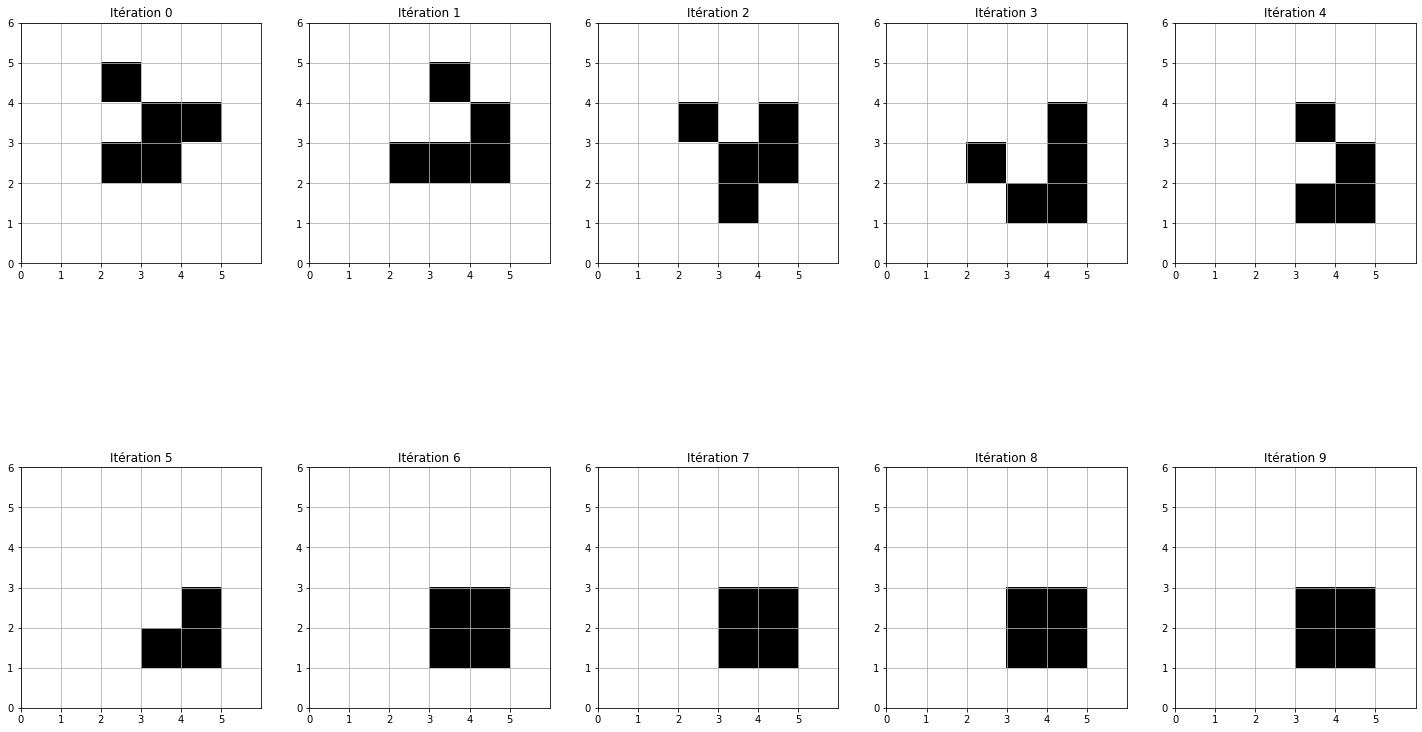

In [9]:
affichage_9(Z)

on remarque qu'à partir de la 7 éme iteration, le nombre de cellule vivantes se stabilise à 4 

In [28]:
# q 7
vect = np.array([0,1,0,0,1,1])
nb_vect = np.zeros(vect.shape)
nb_vect[1:-1] += (vect[:-2] + vect[2:])
## le nb_vect represente le nombre de voisins vivants de chaque cellule, et on a toujours des zeros dans les extremitées(les bornes ne sont pas comptées )



In [29]:
# q 8
Z=np.asarray(Z)
def calcul_nb_voisins_np(Z):
    
    N= np.zeros(np.shape(Z))
    N[1:-1, 1:-1] = Z[0:-2, 0:-2] + Z[:-2, 2:] + Z[2:, :-2] + Z[:-2, 1:-1] + \
        Z[1:-1, 2:] + Z[1:-1, :-2] + Z[2:, 1:-1] + Z[2:, 2:]
    return(N)   
    

In [30]:
calcul_nb_voisins_np(Z)

array([[0., 0., 0., 0., 0., 0.],
       [0., 1., 1., 3., 2., 0.],
       [0., 2., 4., 4., 2., 0.],
       [0., 1., 2., 3., 3., 0.],
       [0., 1., 2., 2., 1., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [49]:
# q 9
def iteration_jeu_np(Z):
   
    Z = np.array(Z)
    a= Z
    N = calcul_nb_voisins_np(Z)
    etou = np.where((a == 1) & ((N == 1) | (N > 3)))
    Z[etou] = 0
    nn= np.where((a == 0) & (N == 3))
    Z[nn] = 1
    return Z

In [50]:
Z = [[0,0,0,0,0,0],
    [0,0,0,1,0,0],
    [0,1,0,1,0,0],
    [0,0,1,1,0,0],
    [0,0,0,0,0,0],
    [0,0,0,0,0,0]]
iteration_jeu_np(Z)



array([[0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 1, 0],
       [0, 0, 1, 1, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [77]:
# q 10
def jeu_np(Z_in, nb_iter):
    while nb_iter != 0:
            Z_in=iteration_jeu_np(Z_in)
            nb_iter=nb_iter-1
    return (Z_in)

In [38]:
Z = [[0,0,0,0,0,0],
    [0,1,0,1,0,0],
    [0,1,0,1,0,0],
    [0,0,1,1,1,0],
    [0,0,0,1,1,0],
    [0,0,0,0,0,0]]
jeu_np(Z,100)

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 0]])

In [95]:
from matplotlib import animation
def animation(Z_in,nb_iter):
    def init(Z_in):
        plt.figure()
        fig = plt.gcf()
        im = plt.imshow(Z_in, cmap='binary')
        plt.show()
        return im,

    def animate(frame):
        Z_iter=jeu_np(Z_in,nb_iter)
        im.set_data(Z_iter)
        return im,

    anim = animation.FuncAnimation(fig, animate, init_func=init,frames=nb_iter)
    return(anim)


In [96]:
animation(Z,40)

AttributeError: 'function' object has no attribute 'FuncAnimation'